![Machine Learning for Scientists in a hurry](https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Title_ML.png?raw=1)

# Boilerplate

In [1]:
!if [ ! -f helpers.py ]; then wget "https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/helpers.py"; fi

In [2]:
# import some custom helper code
import helpers
from helpers import set_css_in_cell_output
get_ipython().events.register('pre_run_cell', set_css_in_cell_output)

In [3]:
!pip install watermark

In [4]:
%%html
<div style="clear: both; display: table;" class="div-white">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 5. Clustering</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 5. Clustering</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/1-line%20logotype124-295.png?raw=1" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/SCPython.png?raw=1" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## Setup

In [5]:
%load_ext watermark

In [6]:
%watermark

Last updated: 2023-10-23T04:02:46.785238+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [7]:
import time
start = time.time()
chapter_number = 5
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import sklearn

In [9]:
%watermark -iv

matplotlib: 3.7.1
numpy     : 1.23.5
pandas    : 1.5.3
sklearn   : 1.2.2



# Where we are on the map?

<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/ml_map.png?raw=1" width="700" title="Precision vs Recall" alt="Precision vs Recall"></a>

# Clustering

Clustering is an unsupervised learning method in which we draw references from datasets consisting of input data without labeled responses. Generally, it is used as a process to find meaningful structure, explanatory underlying processes, generative features, and groupings inherent in a set of examples. It is a collection of objects based on similarity and dissimilarity between them.

In general, we can classify the existing clustering methods as:

1. **Density-Based Methods**: Here we find clusters based on the dense region that have more similarity in the data.
These methods have good accuracy and ability to merge two or several clusters, depending on the density threshold.Example DBSCAN (Density-Based Spatial Clustering of Applications with Noise), OPTICS (Ordering Points to Identify Clustering Structure) etc.

In particular, DBSCAN does not require the number of clusters as a parameter as is the case of K-means. Rather it infers the number of clusters based on the data, and it can discover clusters of arbitrary shape (for comparison, K-Means usually discover spherical clusters). In this case, we use the concept of ɛ-neighborhood, which counts the number of points around a data point within the n-dimensional sphere of radii ɛ and defines the density as this number divided by the sphere volume. The goal then is to identify highly dense neighborhoods, but the volume of each of these neighborhoods is relatively small.

2. **Hierarchical Based Methods**: The clusters formed in this method form a tree type structure based on the hierarchy, also called a dendrogram. New clusters are formed using the previously formed one. There are two top-level methods for finding these hierarchical clusters: Agglomerative (bottom-up approach) and Divisive (top-down approach).
Both of these approaches rely on constructing a similarity matrix between all data points, which is usually calculated by cosine or Jaccard distance. In the case of agglomerative, each data point starts in its cluster. These clusters are then joined greedily, by taking the two most similar clusters together and merging them. While in the case of divisive, all data points start in the same cluster. You can then use a parametric clustering algorithm like K-Means to divide the cluster into two clusters. For each cluster, you further divide it down into two clusters until you hit the desired number of clusters.

Some examples are CURE (Clustering Using Representatives), BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies), etc.

3. **Partitioning Methods**: These methods partition the objects into k clusters and each partition forms one cluster. These algorithms minimize a given clustering criterion by iteratively relocating data points between clusters until a (locally) optimal partition is attained. This method is used to optimize an objective criterion similarity function such as when the distance is a major parameter example K-means, CLARANS (Clustering Large Applications based upon randomized Search) etc.

A very good description of this method can be found in [Report Partitioning Methods](http://users.jyu.fi/~samiayr/pdf/introtoclustering_report.pdf).

4. **Grid-based Methods**: In this method, the data space is formulated into a finite number of cells that form a grid-like structure. All the clustering operations done on these grids are fast and independent of the number of data objects. We start by defining the set of grid cells and then assigning each element to one of the grid cells. The density per cell is then calculated. Those cells with a density below a given threshold are then eliminated. We then
form clusters from contiguous (adjacent) groups of dense cells (usually minimizing a given objective function)
Several interesting methods have been implemented such as STING (Statistical Information Grid), wave cluster, CLIQUE (Clustering In Quest) etc.

There are no labels, no actual output. The question is if there is some structure in the data and if a pattern can be discovered. There are several algorithms for clustering.

A simple summary is in the figure below

<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Clustering.jpeg?raw=1" width="700" height="200" title="Clustering" alt="Clustering"></a>

We will review some of them

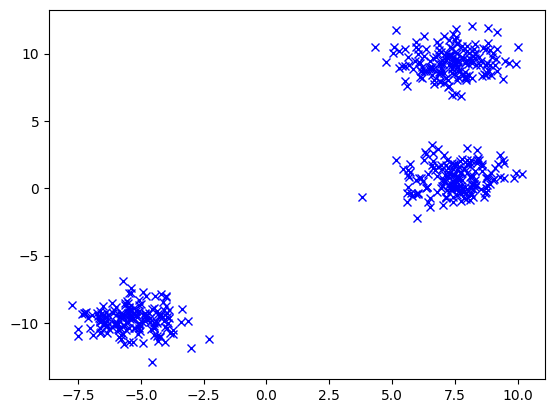

In [10]:
from sklearn import datasets

Xb, _ = datasets.make_blobs(n_samples=500, random_state=8)
#X, _ = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)

plt.plot(Xb[:, 0], Xb[:, 1], 'bx');

## Introduction – Classification _vs_ Clustering

In [11]:
from sklearn.datasets import load_iris

In [12]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

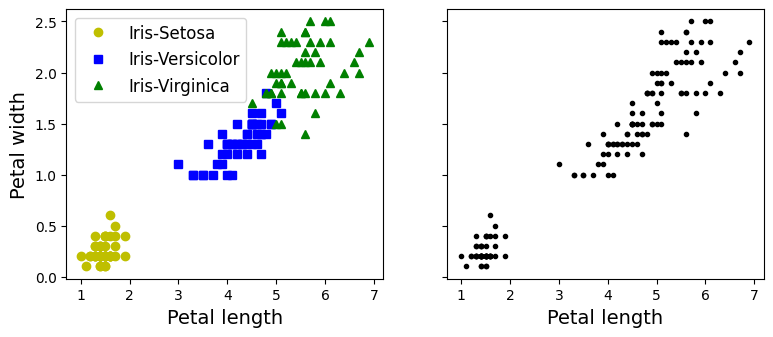

In [13]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris-Versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

A Gaussian mixture model (explained below) can separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

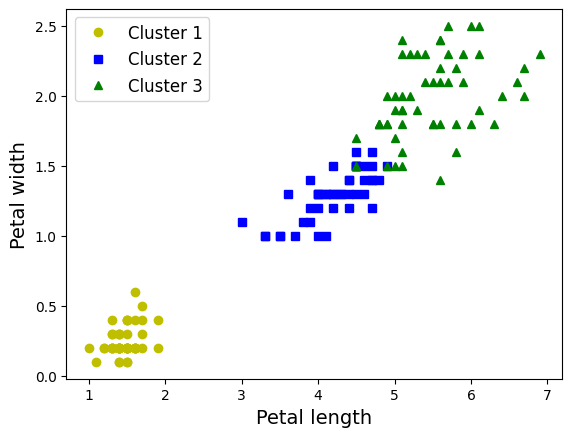

In [16]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [17]:
np.sum(y_pred==y)

145

In [18]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

# Kmeans clustering

The most common algorithm uses an iterative refinement technique. Due to its ubiquity, it is often called the ''k''-means algorithm; it is also referred to as **Lloyd's algorithm**, particularly in the computer science community.

Given an initial set of $k$ means $m_1^{(1)}, \cdots , m_k^{(1)}$, the algorithm proceeds by [alternating between two steps](http://www.inference.phy.cam.ac.uk/mackay/itila/book.html)

**Assignment step**: Assign each observation to the cluster whose mean has the least squared **Euclidean distance**, this is intuitively the "nearest" mean.<ref>Since the square root is a monotone function, this also is the minimum Euclidean distance assignment.</ref> (Mathematically, this means partitioning the observations according to the **Voronoi diagram** generated by the means).

$$S_i^{(t)} = \big \{ x_p : \big \| x_p - m^{(t)}_i \big \|^2 \le \big \| x_p - m^{(t)}_j \big \|^2 \ \forall j, 1 \le j \le k \big\},$$

where each $x_p$ is assigned to exactly one $S^{(t)}$, even if it could be assigned to two or more of them.

**Update step** Calculate the new means (**centroids**) of the observations in the new clusters.

$$m^{(t+1)}_i = \frac{1}{\left|S^{(t)}_i\right|} \sum_{x_j \in S^{(t)}_i} x_j$$

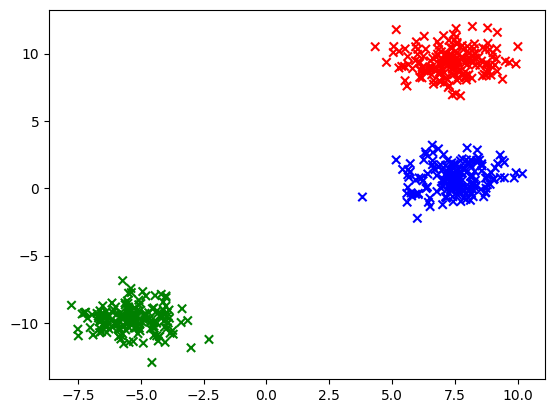

In [19]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, init='random',
                        n_init=1, max_iter=10, random_state=1)
C = kmeans.fit_predict(Xb)

colors = np.array(['b', 'r', 'g'])
plt.scatter(Xb[:, 0], Xb[:, 1], marker="x", c=colors[C])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100, c=colors);

Let's start by generating some blobs:

In [20]:
from sklearn.datasets import make_blobs

In [21]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [22]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Now let's plot them:

In [23]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

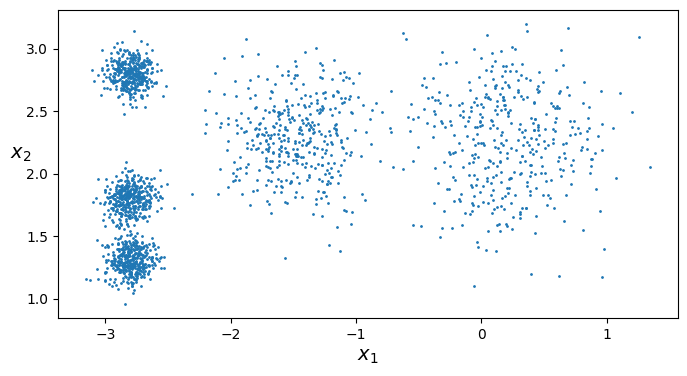

In [24]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

### Fit and Predict

Let's train a K-Means clustering on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [25]:
from sklearn.cluster import KMeans

In [26]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the 5 clusters:

In [27]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [28]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [29]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [30]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

Of course, we can predict the labels of new instances:

In [31]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [32]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

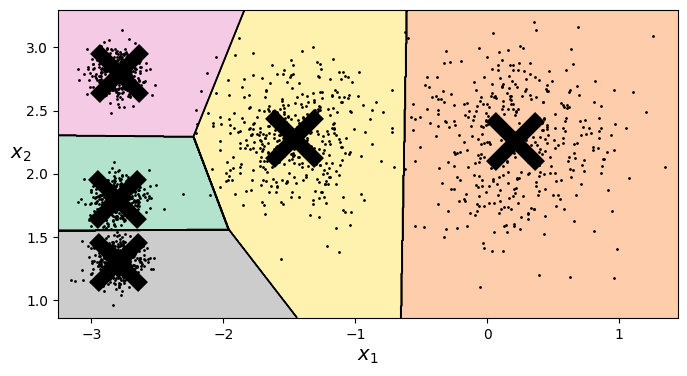

In [33]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

### Hard Clustering _vs_ Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better to measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [34]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [35]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="lloyd"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2, and 3 iterations, to see how the centroids move around:

In [36]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

And let's plot this:

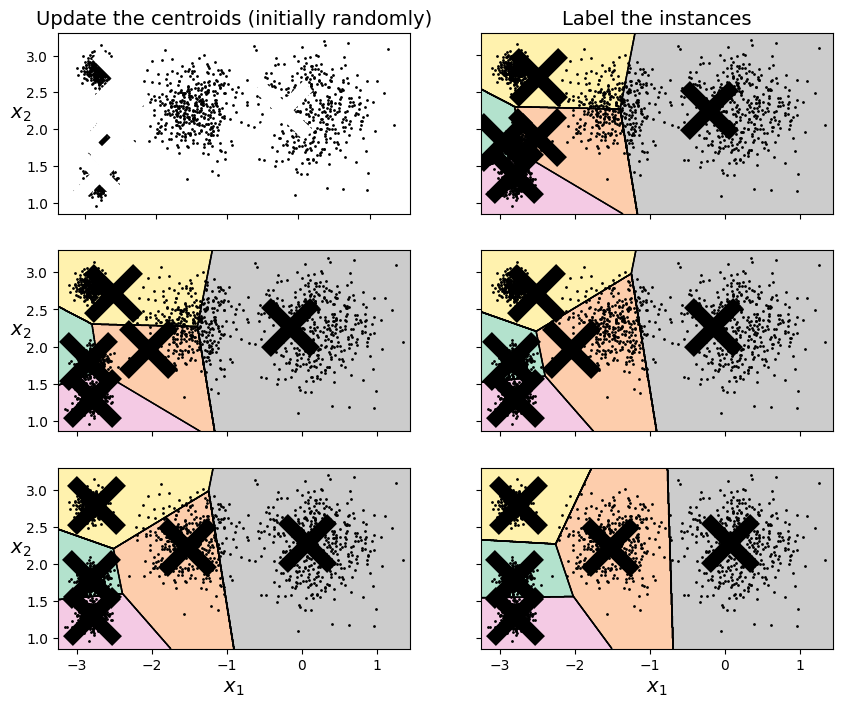

In [37]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [38]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

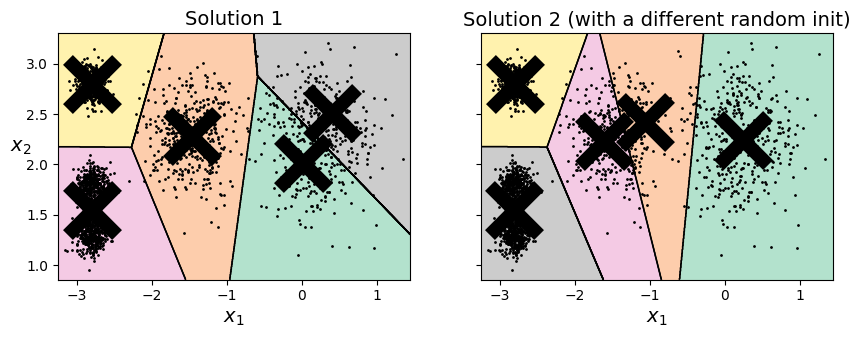

In [39]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [40]:
kmeans.inertia_

211.5985372581684

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [41]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [42]:
kmeans.score(X)

-211.59853725816836

### Multiple Initializations

So one approach to solving the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [43]:
kmeans_rnd_init1.inertia_

223.2910857281903

In [44]:
kmeans_rnd_init2.inertia_

237.462491694429

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [45]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

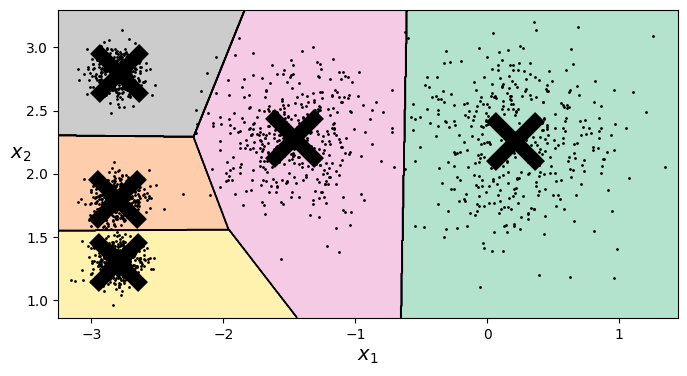

In [46]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely to be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

In [47]:
KMeans()

KMeans()

In [48]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Accelerated K-Means

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B, and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set `algorithm="elkan"`. Note that it does not support sparse data, so by default, Scikit-Learn uses `"elkan"` for dense data, and `"lloyd"` (the regular K-Means algorithm) for sparse data.

In [49]:
%timeit -n 50 KMeans(algorithm="elkan", n_init='auto').fit(X)

The slowest run took 9.40 times longer than the fastest. This could mean that an intermediate result is being cached.
17.8 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [50]:
%timeit -n 50 KMeans(algorithm="lloyd", n_init='auto').fit(X)

The slowest run took 44.19 times longer than the fastest. This could mean that an intermediate result is being cached.
113 ms ± 77.7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [51]:
from sklearn.cluster import MiniBatchKMeans

In [52]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto', random_state=42)

In [53]:
minibatch_kmeans.inertia_

211.65227723196418

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First, let's load MNIST:

In [54]:
from six.moves import urllib
from sklearn.datasets import fetch_openml

#mnist = fetch_openml('mnist_784', version=1, data_home='./data')
#mnist.target = mnist.target.astype(np.int64)

In [55]:
import os
import gzip
from scipy.io import arff
import pandas as pd

In [56]:
if not os.path.exists('data'):
  os.mkdir('data')

In [57]:
!if [ ! -f data/mnist_784.arff ]; then wget "https://www.openml.org/data/download/52667/mnist_784.arff" -O ./data/mnist_784.arff; fi

In [58]:
filename = "./data/mnist_784.arff.gz"
url = "https://www.openml.org/data/download/52667/mnist_784.arff"
if os.path.isfile(filename):
    arff_file = gzip.open(filename,'rt')
else:
    arff_file = "./data/mnist_784.arff"
data, meta = arff.loadarff(arff_file)

In [59]:
df=pd.DataFrame(data)

In [60]:
mnist = {}
mnist['data'] = df.drop('class', axis=1).astype('uint8')
mnist['target'] = df['class'].astype('uint8')

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Next, let's write it to a `memmap`:

In [62]:
filename = "./data/my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [63]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42, n_init='auto')
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init='auto', random_state=42)

If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [64]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia:

In [65]:
np.random.seed(42)

In [66]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init='auto')
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [67]:
best_kmeans.score(X)

-211.62571878891146

Mini-batch K-Means is much faster than regular K-Means:

In [68]:
%timeit KMeans(n_clusters=5, n_init='auto').fit(X)

3.46 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%timeit MiniBatchKMeans(n_clusters=5, n_init='auto').fit(X)

The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached.
11.9 ms ± 9.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's *much* faster! However, its performance is often lower (higher inertia), and it keeps degrading as _k_ increases. Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:

In [70]:
from timeit import timeit

In [71]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42, n_init='auto')
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init='auto')
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

(1.0, 100.0, 0.0, 6.0)

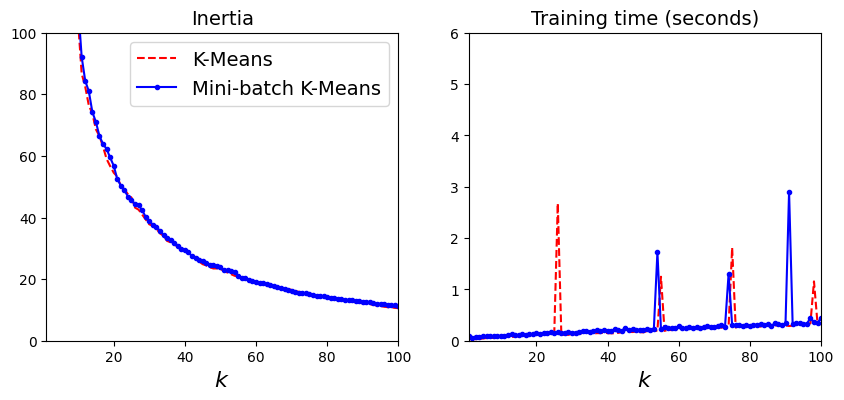

In [72]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

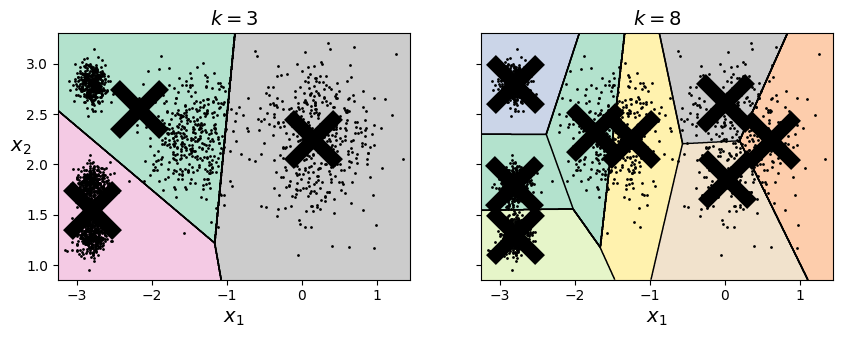

In [73]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_k8 = KMeans(n_clusters=8, random_state=42, n_init='auto')

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

Ouch, these two models don't look great. What about their inertias?

In [74]:
kmeans_k3.inertia_

653.2573264005191

In [75]:
kmeans_k8.inertia_

119.6240806663117

No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [76]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

(1.0, 8.5, 0.0, 1300.0)

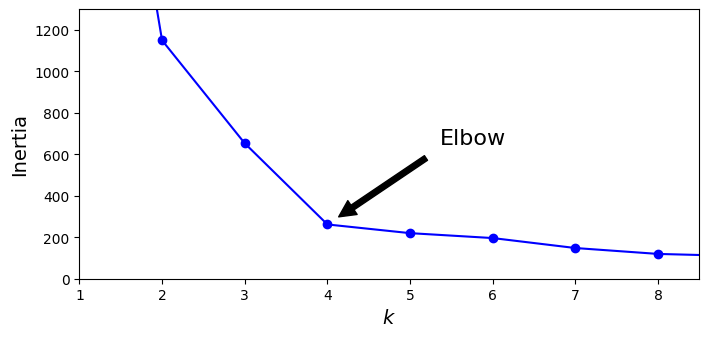

In [77]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

As you can see, there is an elbow at $k=4$, which means that fewer clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course, in this example, it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

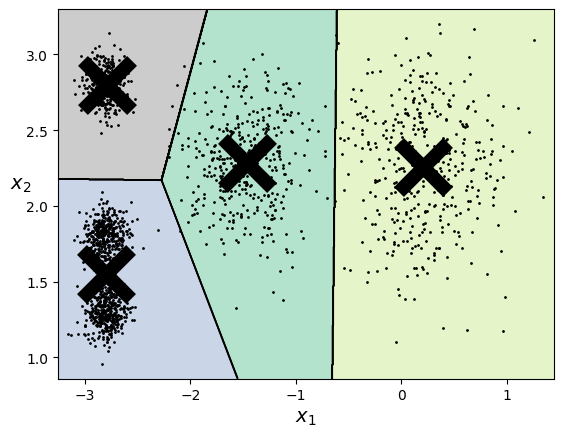

In [78]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [81]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

(1.8, 8.5, 0.55, 0.7)

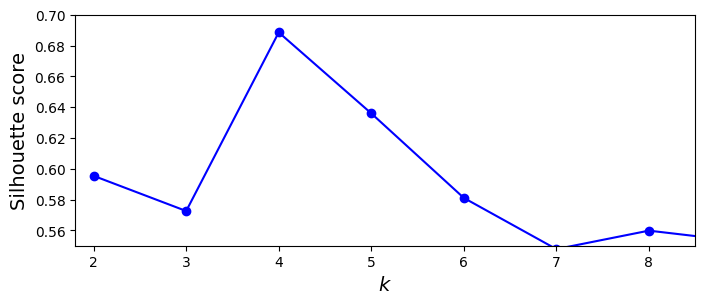

In [82]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

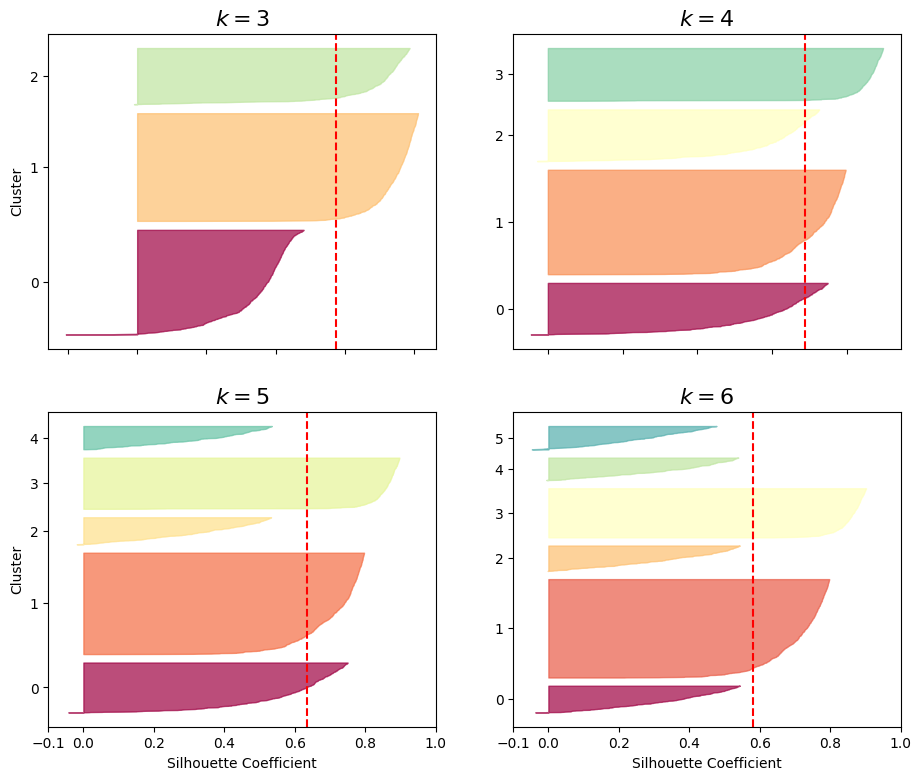

In [83]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

### Limits of K-Means

In [84]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

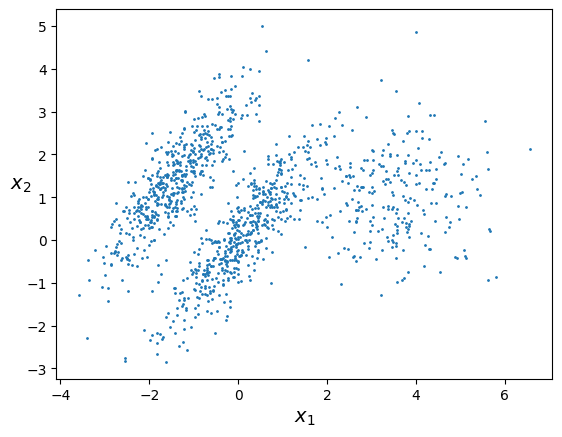

In [85]:
plot_clusters(X)

In [86]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

Text(0.5, 1.0, 'Inertia = 2179.5')

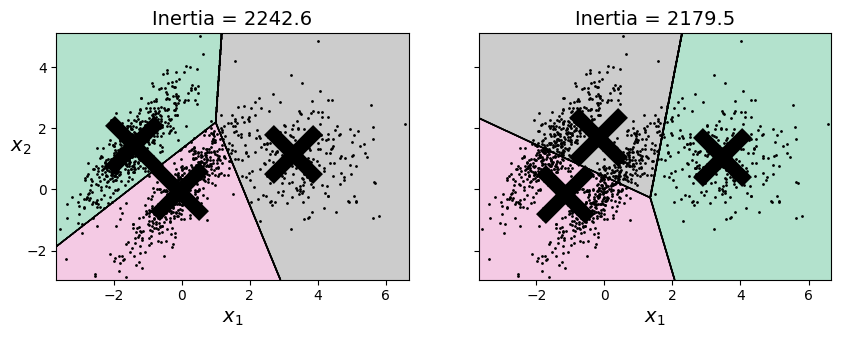

In [87]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

### Using clustering for image segmentation

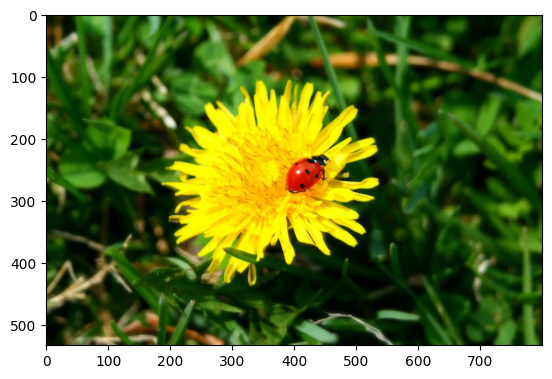

In [88]:
import os
import requests
from matplotlib.image import imread
url = 'https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/fig/ladybug.png'
if not os.path.exists('fig'):
  os.mkdir('fig')
# This statement requests the resource at
# the given link, extracts its contents
# and saves it in a variable
data = requests.get(url).content

# Opening a new file named img with extension .jpg
# This file would store the data of the image file
f = open('fig/ladybug.png','wb')

# Storing the image data inside the data variable to the file
f.write(data)
f.close()

if os.path.exists('fig/ladybug.png'):
  image = imread(os.path.join("fig","ladybug.png"))
  plt.imshow(image)
  image.shape

In [89]:
image.shape

(533, 800, 3)

In [90]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto').fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [91]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

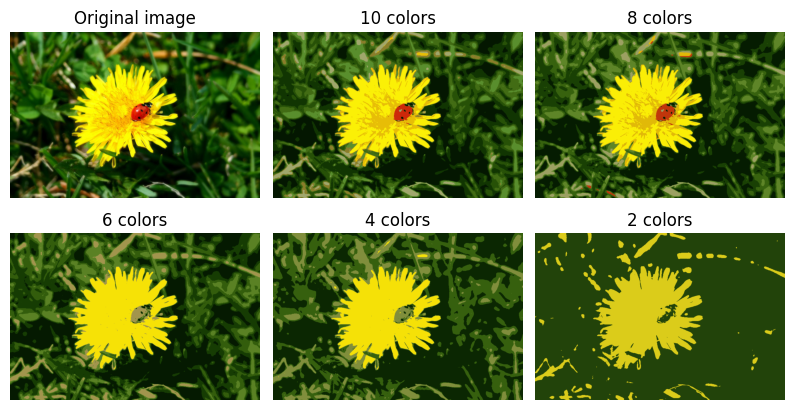

In [92]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

### Using Clustering for Preprocessing

Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [93]:
from sklearn.datasets import load_digits

In [94]:
X_digits, y_digits = load_digits(return_X_y=True)

Let's split it into a training set and a test set:

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Now let's fit a Logistic Regression model and evaluate it on the test set:

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [99]:
log_reg.score(X_test, y_test)

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy. Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [100]:
from sklearn.pipeline import Pipeline

In [101]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42, n_init='auto')),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans',
                 KMeans(n_clusters=50, n_init='auto', random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [102]:
pipeline.score(X_test, y_test)

0.9755555555555555

In [103]:
1 - (1 - 0.977777) / (1 - 0.968888)

0.28570969400874346

How about that? We reduced the error rate by over 28%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = dict(kmeans__n_clusters=range(2, 100, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=7; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=12; total time=   1.1s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=12; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=17; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=17; total time=   1.8s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto',
                                               random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100, 5)}, verbose=2)

In [106]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [107]:
grid_clf.score(X_test, y_test)

0.9755555555555555

The performance improved most with $k=72$, so 72 it is.

### Clustering for Semi-supervised Learning

Another use case for clustering is in semi-supervised learning when we have plenty of unlabeled instances and very few labeled instances.

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [108]:
n_labeled = 50

In [109]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [110]:
k = 50

In [111]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

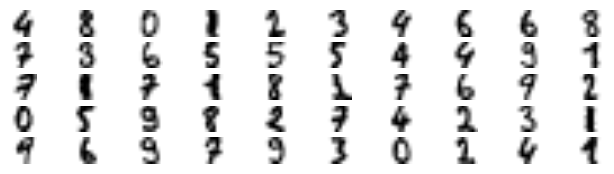

In [112]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [113]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [114]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.20666666666666667

Wow! We jumped from 83.3% accuracy to 92.2%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [115]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [116]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [117]:
log_reg.score(X_test, y_test)

0.22444444444444445

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 20th percentile closest to the centroid:

In [118]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [119]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [120]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [121]:
log_reg.score(X_test, y_test)

0.18444444444444444

Nice! With just 50 labeled instances (just 5 examples per class on average!), we got 94% performance, which is pretty close to the performance of logistic regression on the fully labeled _digits_ dataset (which was 96.9%).

This is because the propagated labels are pretty good: their accuracy is very close to 99%:

In [122]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.2103448275862069

You could now do a few iterations of _active learning_:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

## Density-based spatial clustering of applications with noise (DBSCAN)  

This method is based on a density-based notion of the cluster, similar to what we have explained before. Due to that, it
discovers clusters of arbitrary shape in spatial databases with noise. For that, first of all, it groups the points in high-density regions, and then it marks outliers as the point that lie alone, in the low-density regions. For this process, it needs to define two parameters, the radius for the neighborhood of point p which we denote as ε, and minimum number of points in the given neighborhood, which we denote as MinPts. Based on this, we can define three types of points, if its density is high we called a core point, if the density is low (but in the neighborhood of a core point) we called a boundary point and finally, we called a noise point, any point that is not a core point nor a border point. We say that q is directly density-reachable from a point p if p is a core point and q is in p’s ε-neighborhood. We also say that a point p is density-reachable from a point q if there is a chain of points p1, ... , pn, with p1 = q, pn = p such that pi+1 is directly density-reachable from pi. Then, a pair of points p and q are density-connected If they are commonly density-reachable from point s.
Based on the previous definitions, we define a cluster as a subset of the data that have the two following properties: (i) $\forall p,q$ if $p \in C$ and if $q$ density-reachable from $p$, then also $q \in C$ (ii) $\forall p, q \in C$, p and q are density-connected.

A simple use is shown below. For that, we will use the dataset make_moons, which creates two interleaving circles. See description in [Interleaving Circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)



In [123]:
from sklearn.datasets import make_moons

In [124]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [125]:
from sklearn.cluster import DBSCAN

In [126]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [127]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [128]:
len(dbscan.core_sample_indices_)

808

In [129]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [130]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [131]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [132]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [133]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

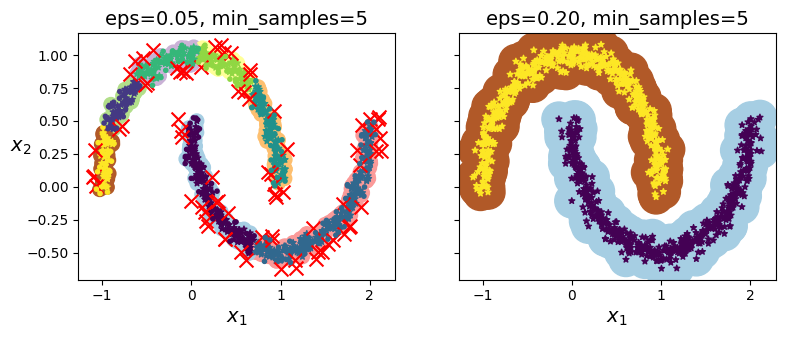

In [134]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

In [135]:
dbscan = dbscan2

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [138]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [139]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

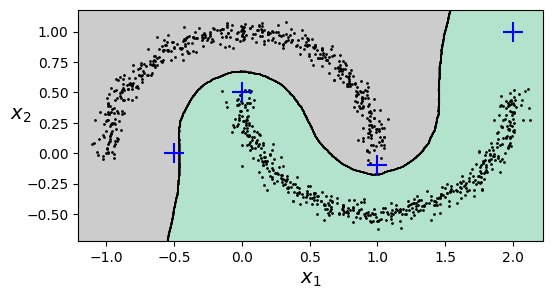

In [140]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10);

In [141]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Other Clustering Algorithms

### Spectral Clustering

Before we describe this algorithm, let me introduce some useful notation and make a quick introduction to graph theory. This discussion has been taken from the [Tutorial of Spectral Clustering](https://www.cs.cmu.edu/~aarti/Class/10701/readings/Luxburg06_TR.pdf)

Let me consider some data points $x_1, x_2, x_3, \cdots, x_n$ (they could be one or a vector) and some notion of similarity between all pairs of data points $s_{ij}$. If we assume that the only correlation we know in the data is based on the similarity, we can build a similarity graph $G = (V, E)$. The vertices $v_i$ in this graph represent the data points $x_i$. Two vertices are connected if the similarity $s_{ij}$ between the corresponding data points $x_i$ and $x_j$ is positive (or larger than a certain threshold), and the edge is weighted by $s_{ij}$ . The problem of clustering can now be reformulated using the similarity graph: we want to find a partition of the graph such that the edges between different groups have very low weight (which means that points in different clusters are dissimilar from each other) and the edges within a group have high weight (which means that points within the same cluster are similar to each other). Similarly, we can define The weighted adjacency matrix of the graph as the matrix $S$ that contains the similarity values between all points. The degree of a vertex $V_i$ is obtained as $d_i = \sum^n S_{ij}$.
The degree matrix D is defined as the diagonal matrix with the degrees $d_i$.

Given a subset ofvertices $A \subset V$, we denote its complement by $\overline{A}$.We define the indicator vector $1_A =(f1,...,fn)′$ as the vector with entries $f_i = 1$ if $V_i \in A$ and $f_i = 0$ otherwise. For convenience, we introduce the shorthand notation $i \in A$ for the set of indices $\{i | V_i \in A\}$. We consider two different ways of measuring the “size” of a subset $A \subset V$: (i) $|A|$, the number of vertices in $A$ (ii) vol($A$) = $\sum_{i \in A} d_i$.

A subset $A \subset V$ of a graph is connected if any two vertices in $A$ can be joined by a path such that all intermediate points also lie in $A$. A subset $A$ is called a connected component if it is connected and if there are no connections between vertices in $A$ and $\overline{A}$. The sets $A_1, \cdots ,A_k$ form a partition of the graph if $A_i \cap A_j = \emptyset$ and $A1 \cup \cdots \cup  A_k = V$.

Now, based on the previous definition, we can now transform any $x_1, \cdots, x_n$ data point into a graph.
The goal when constructing similarity graphs is to model the local neighborhood relationships between the data points. Moreover, most of the constructions below lead to a sparse representation of the data, which has computational advantages.

1) **ε-neighborhood graph**. Connect all points whose pairwise distances are smaller than ε (unweighted graph).

2) **k-nearest neighbor graphs**. Connect vertex $V_i$ with vertex $V_j$ if $V_j$ is among the $k$ nearest neighbors of $V_i$. However, this definition leads to a directed graph, as the neighborhood relationship is not symmetric. Now there are two ways of making this graph undirected. The first way is to simply ignore the directions of the edges. The resulting graph is what is usually called the k-nearest neighbor graph. The second choice is to connect vertices $V_i$ and $V_j$ if both $V_i$ are among the k-nearest neighbors of $V_j$ and $V_j$ is among the k-nearest neighbors of $V_i$. The resulting graph is called the mutual k-nearest neighbor graph. In both cases, after connecting the appropriate vertices we weigh the edges by the similarity of the adjacent points.

3) **Fully connected graph**. Connect all points with positive similarity with each other, and we
weight all edges by $s_{ij}$. As the graph should model the local neighborhood relationships, this construction is
usually only chosen if the similarity function itself already encodes mainly local neighborhoods.

The main tools for spectral clustering are graph Laplacian matrices. Though there is not a unique definition for these matrices, here I will describe the most known ones. In the following we always assume that $G$ is an undirected, weighted graph with weight matrix $W$, where $w_{ij} = w_{ji} \ge 0$. When we talk about eigenvectors of a matrix, we do not necessarily assume that they are normalized to norm 1. Eigenvalues will always be ordered increasingly, respecting multiplicities. By “the first k eigenvectors” we refer to the eigenvectors corresponding to the k smallest eigenvalues.

a) **Unnormalized graph Laplacian**. $L = D − W$. Some of the properties of this matrix can be found in [Mojan Mojar description](https://www.fmf.uni-lj.si/~mohar/Papers/Montreal.pdf). For our application here, the most important property says: let $G$ be an undirected graph with non-negative weights. Then the multiplicity $k$ of the eigenvalue $\lambda$ of $L$ equals the number of connected components $A_1, \cdots , A_k$ in the graph.

b) **Normalized graph Laplacians**. There are two useful definitions for this type of Laplacian. $L_{sym} =  I - D^{-1/2} W D^{-1/2}$ and $L_{rw} = I - D^{-1} W $. $L_{sym}$ as it is a symmetric matrix, and the second one by $L_{rw}$ as it is closely connected to a random walk. A very good description of these matrices can be found in [Fan Chung graph theory website](http://www.math.ucsd.edu/~fan/research/revised.html). Additional to a large set of properties, the most important can be summarized in the following theorem.

Let $G$ be an undirected graph with non-negative weights. Then the multiplicity $k$ of the eigenvalue $0$ of both $L_{rw}$ and $L_{sym}$ equals the number of connected components $A_1, \cdots,A_k$ in the graph.For $L_{rw}$, the eigenspace of $0$ is spanned by the indicator vectors $1_{A_i}$ of those components. For $L_{sym}$, the eigenspace of $0$ is spanned by the vectors $D^{1/2} 1_{A_i}$.

Now, with all these definitions and properties we can introduce spectral clustering. While there are different versions, they are similar in spirit, that is why we only present one here but we encourage the reader to search for references in the topic for other implementations.

The so-called Unnormalized spectral clustering works as follows. First of all, the data is taken to build the similarity matrix $S_{ij}$. With this information and a predefined number of $k$ clusters, we can build the adjacency matrix $W$. From this new matrix, we can calculate the unnormalized Laplacian $L$ and its corresponding eigenvalues and eigenvectors. Take the first lower eigenvectors $V_1, \cdots, V_k$ and create the $V$ from these set of eigenvectors. Now cluster the points which are present in these eigenvectors with the $k$-means algorithm into clusters $C_1, \cdots C_k$. These clusters correspond to the searched partition.

Now let's see it in action.


In [142]:
from sklearn.cluster import SpectralClustering

In [143]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [144]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [145]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [146]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

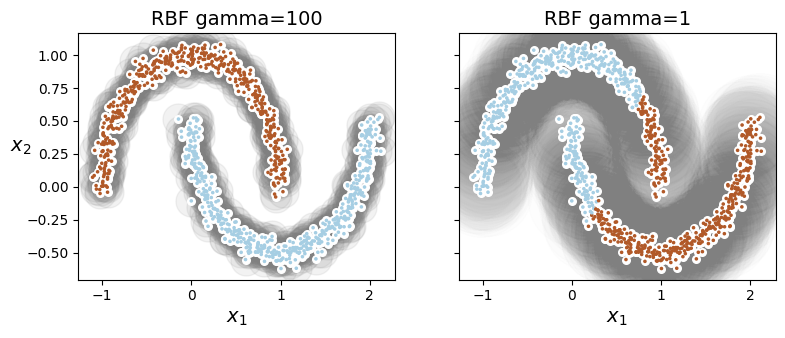

In [147]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


### Agglomerative Clustering

As we have discussed before, in this method, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed. Here is how it works:

In [148]:
from sklearn.cluster import AgglomerativeClustering

In [149]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [150]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [151]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [152]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures

This is a probabilistic approach to clustering which avoids some of the known problems with other methods that depend on a centroid distance. In this approach, we describe each cluster by its centroid (mean), covariance, and the size of the cluster or the number of samples in that cluster (Weight). This distribution is denoted in the literature as $\pi$. Here rather than identifying clusters by “nearest” centroids, as is the case of the K-means, we fit a set of $k$ Gaussians to the data. From these, we estimate the gaussian distribution parameters such as mean and Variance for each cluster and the weight of a cluster. That means that we will have a probability distribution that depends on all these calculated parameters $\theta = \{ \vec{\mu}, \vec{\sigma}, \vec{\pi} \}$, where the vector dimensionality corresponds to the number of Gaussians. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters as each sample can be assigned to more than one cluster with a certain probability. Therefore the belonging to a cluster is modeled by a mixture of uni-modal Gaussian distributions.

This is not important but for those more comfortable with probability theory, this method can be written as:

P(x | \theta ) = \sum^M \pi_i  \mathcal{N} \left( x | \mu_i, \sigma_i \right)
where the sum goes over all clusters.

Now consider an observed data set comprising N observations $x_n$, which are assumed to be drawn independently from the mixture distribution (previous equation). The probability of the observed data set, given the mixing coefficients and the parameters of the components, is then given by

P(x | \theta ) = \prod_{n=1}^N \sum^M \pi_i  \mathcal{N} \left( x_n | \mu_i, \sigma_i \right)
which corresponds to the likelihood function.


In [153]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [154]:
from sklearn.mixture import GaussianMixture

In [155]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Let's look at the parameters that the EM algorithm estimated:

In [156]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [157]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [158]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

Did the algorithm converge?

In [159]:
gm.converged_

True

Yes, good. How many iterations did it take?

In [160]:
gm.n_iter_

4

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [161]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [162]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [163]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [164]:
y_new

array([0, 0, 1, 2, 2, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:

In [165]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [166]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215022

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [167]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

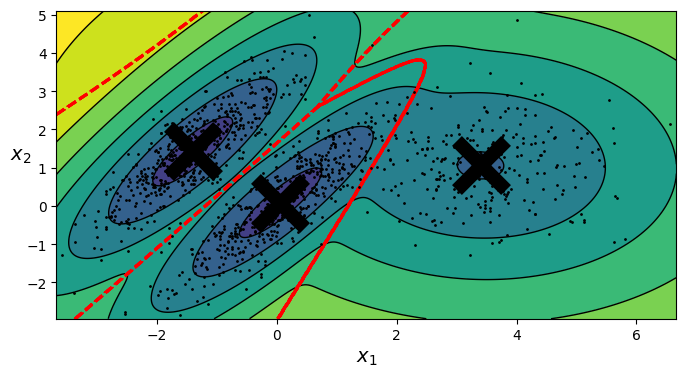

In [168]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [169]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [170]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


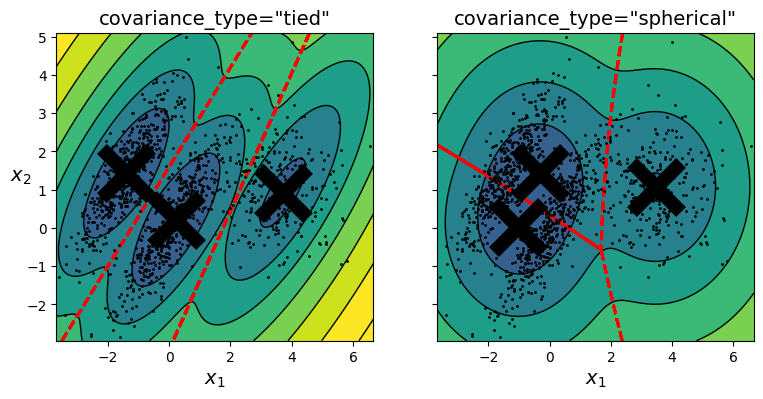

In [171]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

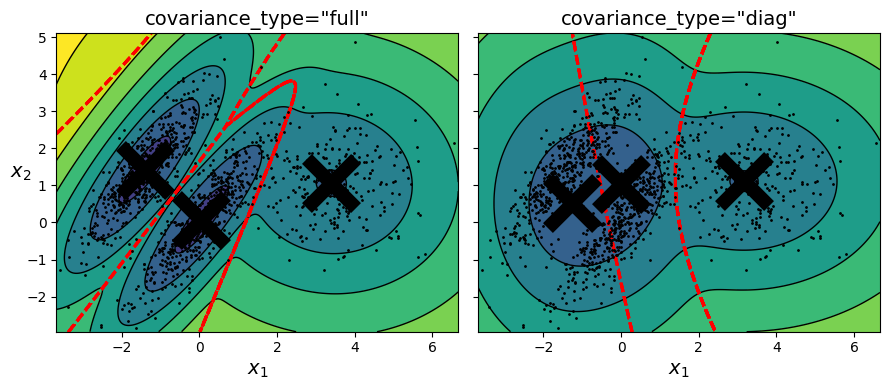

In [172]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Anomaly Detection using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [173]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

(-2.9486047751812894, 5.1)

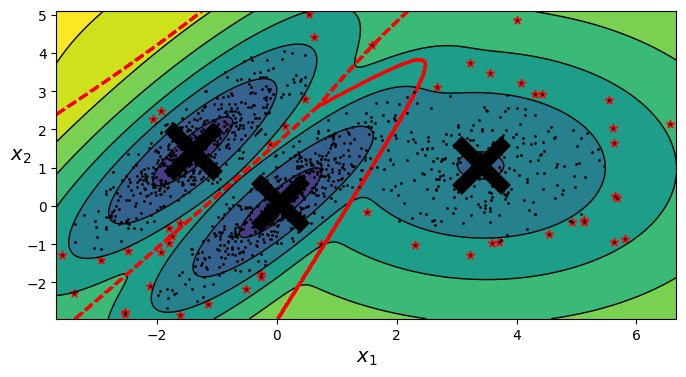

In [174]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

## Model selection

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [175]:
gm.bic(X)

8189.747000497186

In [176]:
gm.aic(X)

8102.521720382148

We could compute the BIC manually like this:

In [177]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [178]:
bic, aic

(8189.747000497186, 8102.521720382148)

In [179]:
n_params

17

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [180]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [181]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

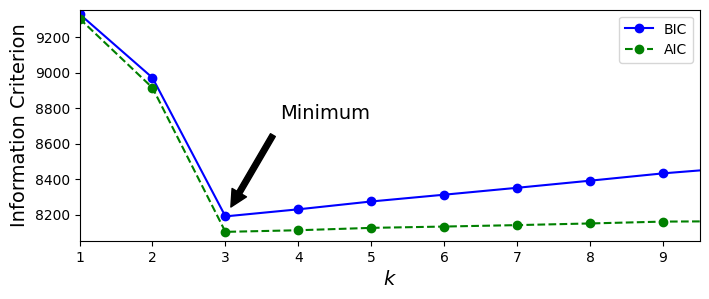

In [182]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend();

Let's search for the best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [183]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [184]:
best_k

3

In [185]:
best_covariance_type

'full'

## Variational Bayesian Gaussian Mixtures

Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [186]:
from sklearn.mixture import BayesianGaussianMixture

In [187]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

The algorithm automatically detected that only 3 components are needed:

In [188]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

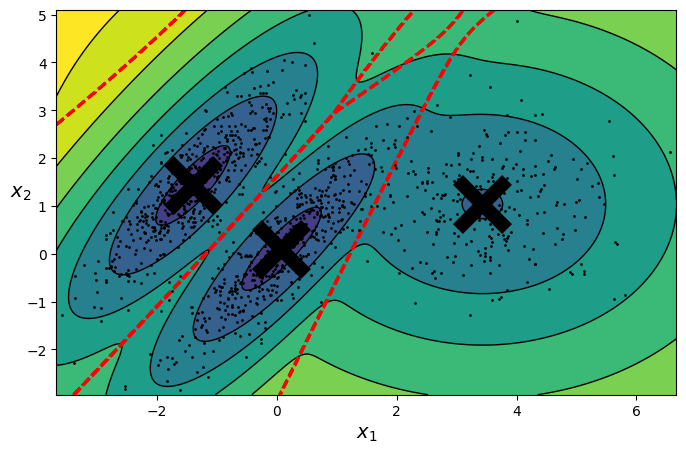

In [189]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [190]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [191]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [192]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

Text(0.5, 1.0, 'weight_concentration_prior = 10000')

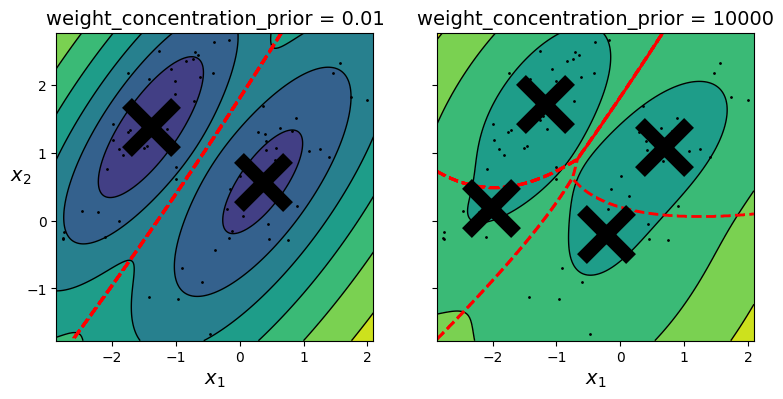

In [193]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

Note: the fact that you see only 3 regions in the right plot although there are 4 centroids is not a bug. The weight of the top-right cluster is much larger than the weight of the lower-right cluster, so the probability that any given point in this region belongs to the top right cluster is greater than the probability that it belongs to the lower-right cluster.

In [194]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [195]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

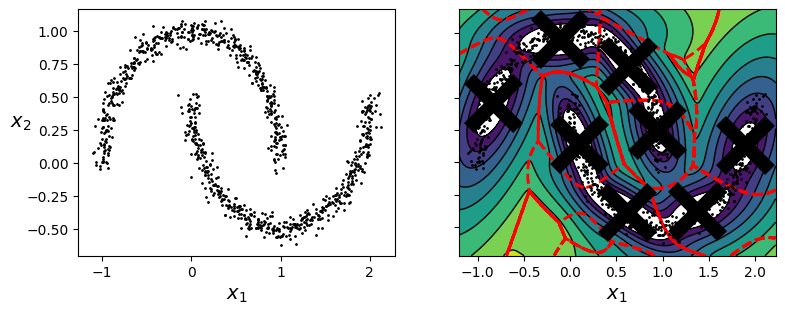

In [196]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

## Likelihood Function

In [197]:
from scipy.stats import norm

In [198]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1) / (xx[1] - xx[0])

Text(0.5, 1.0, '$\\log \\, \\mathcal{L}(\\theta|x=2.5)$')

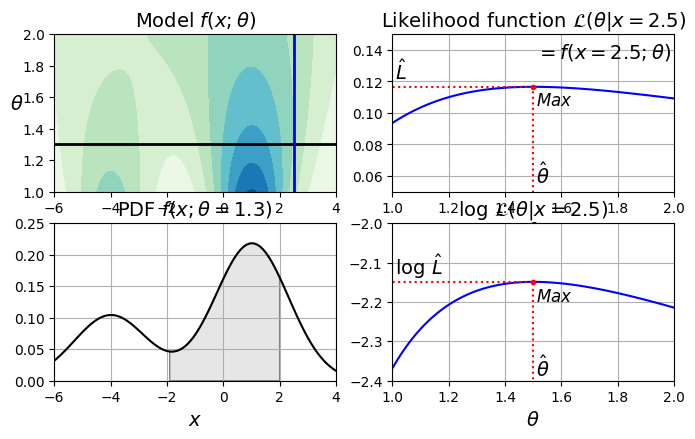

In [199]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

# Hierarchical clustering

As discussed before, this clustering technique is divided into two types (i) Agglomerative and (ii) Divisive.

In the case of Agglomerative, initially each data point is considered as an individual cluster. Then the proximity matrix is calculated. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed. To depict the process, a dendrogram is used. A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

In Divisive Hierarchical clustering, we consider all the data points as a single cluster and in each iteration, we separate the data points from the cluster which are not similar. Each data point that is separated is considered an individual cluster. In the end, we’ll be left with n clusters. We should point out that this methodology is not as used as the Agglomerative one.

One detail is left before we apply this methodology. How do we define similarity?


1) MIN. This version is also known as the single linkage algorithm and it can be defined as the similarity of two clusters C1 and C2 is equal to the minimum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2. In practice, pick the two closest points such that one point lies in cluster one and the other point lies in cluster 2 and take their similarity and declare it as the similarity between two clusters.

2) MAX. This similarity is also known as the complete linkage algorithm, this is exactly opposite to the MIN approach. The similarity of two clusters C1 and C2 is equal to the maximum of the similarity between points $P_i$ and $P_j$ such that $P_i$ belongs to $C_1$ and $P_j$ belongs to $C_2$. In practice, pick the two farthest points such that one point lies in cluster one and the other point lies in cluster 2 and take their similarity and declare it as the similarity between two clusters.

3) Group Average. Here you take all the pairs of points and compute their similarities and calculate the average of the similarities.

4) Distance Between Centroids. Here you will compute the centroids of two clusters $C_1$ & $C_2$ and take the similarity between the two centroids as the similarity between two clusters. This is a less popular technique in the real world.

5) Ward’s Method. In this approach, the similarity between two clusters is exactly as the Group Average except that Ward’s method calculates the sum of the square of the distances $P_i$ and $P_J$.

Now, let us go into business and demonstrate its uses.


In [200]:
from scipy.cluster.hierarchy import distance

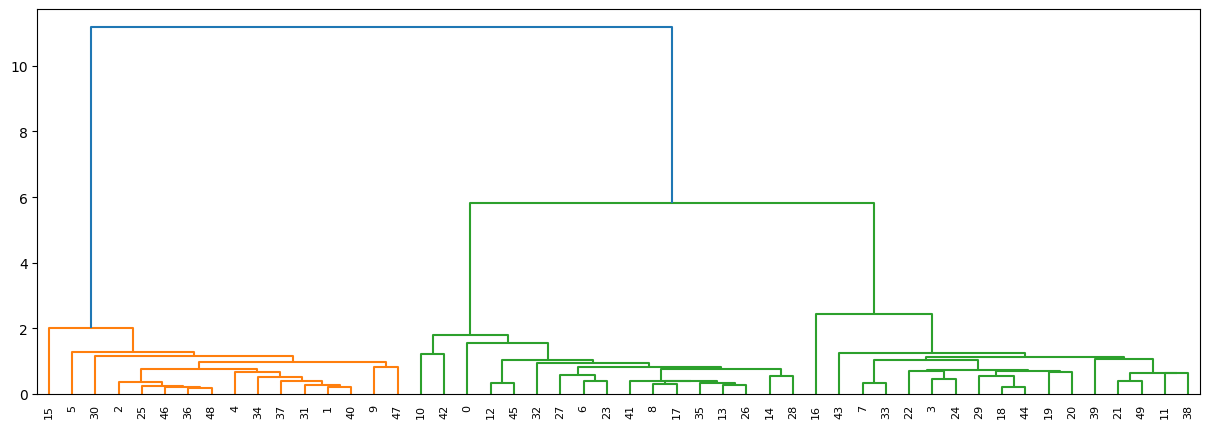

In [201]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X, _ = datasets.make_blobs(n_samples=50, random_state=8)
# X, _ = datasets.make_circles(n_samples=500, factor=.5, noise=.05)

Z = linkage(X)
plt.subplots(figsize=(15,5))
P = dendrogram(Z);

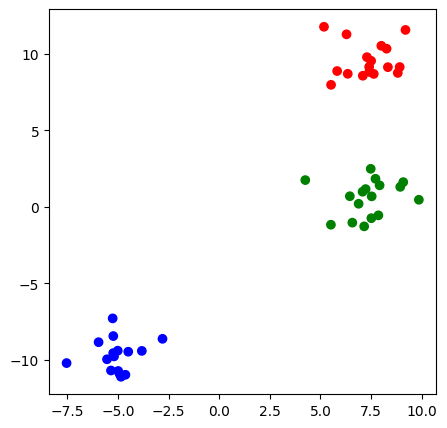

In [202]:
T = fcluster(Z, 3, 'maxclust')
colors = np.array(['b', 'r', 'g', 'y', 'k'])

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], color=colors[T-1]);

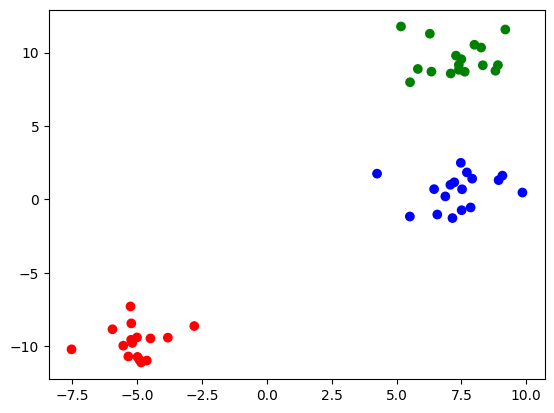

In [203]:
aggl = cluster.AgglomerativeClustering(n_clusters=3)
C = aggl.fit_predict(X)

colors = np.array(['b', 'r', 'g'])
plt.scatter(X[:, 0], X[:, 1], c=colors[C]);

# Microarray data clustering

This technique has been developed mostly on bioinformatics. In this case, a microarray is a collection of small DNA spots attached to a solid surface. In microarray experiments, the signal collected from each spot is used to estimate the expression level of a gene. A microarray contains thousands of DNA spots, covering almost every gene in a genome. Then, genes with similar expression patterns are grouped and are connected by a series of branches (clustering tree or dendrogram). Experiments with similar expression profiles can also be grouped using the same method.

A nice introduction can be found in the following references:

Rosenwald, Andreas, et al. "The use of molecular profiling to predict survival after chemotherapy for diffuse large-B-cell lymphoma." New England Journal of Medicine 346.25 (2002): 1937-1947.

http://www.nejm.org/doi/full/10.1056/NEJMoa012914#t=article  
"Hierarchical clustering was used to define subgroups of diffuse large-B-cell lymphoma."

Data:  
http://llmpp.nih.gov/DLBCL/

In [204]:
def RedBlackGreen():
    cdict = {'red':   ((0.0, 0.0, 0.0),
                       (0.5, 0.0, 0.1),
                       (0.7, 1.0, 1.0),
                       (1.0, 1.0, 1.0)),

             'blue': ((0.0, 0.0, 0.0),
                      (1.0, 0.0, 0.0)),

             'green':  ((0.0, 0.0, 1.0),
                        (0.3, 1.0, 1.0),
                       (0.5, 0.1, 0.0),
                       (1.0, 0.0, 0.0))
            }

    my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return my_cmap

redblackgreen = RedBlackGreen()

In [205]:
url='https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/cache/Fig1A.cdt'

if not os.path.exists('data'):
  os.mkdir('data')

if not os.path.exists('data/Fig1A.cdt'):
    # This statement requests the resource at
    # the given link, extracts its contents
    # and saves it in a variable
    data = requests.get(url).content

    # Opening a new file named img with extension .jpg
    # This file would store the data of the image file
    f = open('data/Fig1A.cdt','wb')

    # Storing the image data inside the data variable to the file
    f.write(data)
    f.close()

df = pd.read_csv("data/Fig1A.cdt", sep="\t", index_col=['UNIQID'])
df = df.iloc[2:, 3:-2]

df2 = df.astype(float).fillna(0)
X = df2.values.T

In [206]:
X.shape

(274, 100)

In [207]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist

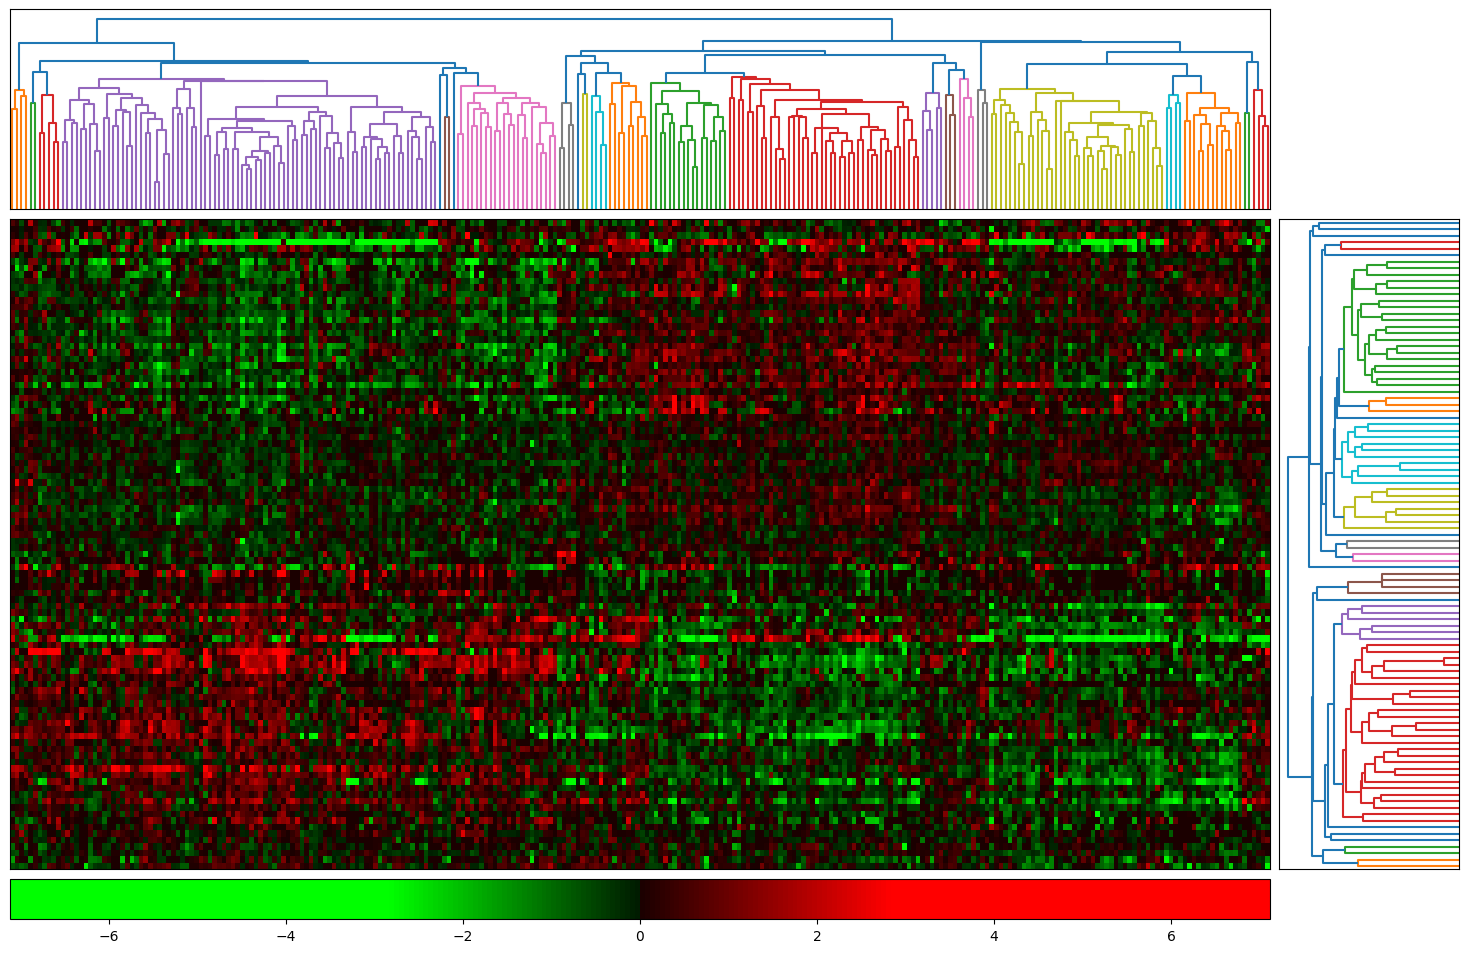

In [208]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_axes([0.1,0.71,0.7,0.2])
Y = sch.linkage(dist.pdist(X, 'correlation'), method='average')
Z1 = sch.dendrogram(Y)
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.805,0.05,0.1,0.65])
Y = sch.linkage(dist.pdist(X.T, 'correlation'), method='average')
Z2 = sch.dendrogram(Y, orientation='left')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.1,0.05,0.7,0.65])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
X = X[idx1,:]
X = X[:,idx2]
norm = plt.cm.colors.Normalize(vmax=abs(X).max(), vmin=-abs(X).max())
im = axmatrix.matshow(X.T, aspect='auto', origin='lower', cmap=redblackgreen, norm=norm)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# # Plot colorbar.
axcolor = fig.add_axes([0.1,0.,0.7,0.04])
plt.colorbar(im, cax=axcolor, orientation='horizontal');

"Panel A shows the hierarchical clustering of diffuse large-B-cell lymphomas from 240 patients with the untreated disease and 34 patients who had previously been treated or who had a preexisting low-grade lymphoma, according to the level of expression of 100 genes. Red areas indicate increased expression, and green areas decreased expression. Each column represents a single diffuse large-B-cell lymphoma, and each row represents a single gene. ..."

---

# Acknowledgments

This notebook is based on a variety of sources, usually other notebooks, the material was adapted to the topics covered during lessons. In some cases, the original notebooks were created for Python 2.x or older versions of Scikit-learn or Tensorflow and they have to be adapted to at least Python 3.7.

We acknowledge the support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/NSF.jpg?raw=1" alt="National Science Foundation" style="width:50%" align="left" height="100" width="100">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/DOE.jpg?raw=1" alt="National Science Foundation" style="width:50%" align="right" height="100" width="100">
</div>

---

# References

The snippets above are meant only to give a brief introduction to some of the most popular techniques in machine learning so you can decide whether this kind of analysis might be useful in your research. If it seems like machine learning will be important in your work, you may want to check out some of the resources listed below (arranged roughly from least to most technical):

This list is by no means an exhaustive list of books and resources. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Machine Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Hands-On Machine Learning  with Scikit-Learn and TensorFlow"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Hands-On%20Machine%20Learning%20%20with%20Scikit-Learn%20and%20TensorFlow.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Hands-On Machine Learning  with Scikit-Learn and TensorFlow (First Edition [There is a second edition])<br>
      Auréleien Géron<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Python Machine Learning - Raschka"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Python%20Machine%20Learning%20-%20Raschka.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Sebastian Raschka and Vahid Mirjalili<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Foundations of Machine Learning - Mohri"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Foundations%20of%20Machine%20Learning%20-%20Mohri.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Foundations of Machine Learning (Second Edition)<br>
      Mehryar Mohri, Afshin Rostamizadeh and Ameet Talwalkar<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Machine Learning - Alpaydin"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Introduction%20to%20Machine%20Learning%20-%20Alpaydin.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Machine Learning (Fourth Edition)<br>
      Ethem Alpaydin<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Machine Learning, a Probabilistic Perspective - Murphy"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Machine%20Learning,%20a%20Probabilistic%20Perspective%20-%20Murphy.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Kevin P. Murphy<br>
      2012<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Elements of Statistical Learning - Hastie"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Elements%20of%20Statistical%20Learning%20-%20Hastie.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      <a href="https://hastie.su.domains/Papers/ESLII.pdf">Elements of Statistical Learning</a><br>
      Trevor Hastie, Robert Tibshirani, and Jerome Friedman<br>
      2008<br>
  </div>
</div>


### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)

 * Aurelien Geron Hands-on Machine Learning with Scikit-learn
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)


 * [A Friendly Introduction to Machine Learning](https://www.youtube.com/watch?v=IpGxLWOIZy4)

In this 30-minute video, Luis Serrano (head of machine learning at Udacity) offers intuitive, user-friendly introductions to the mechanics that drive several machine learning models, including Naive Bayes, Decision Tree, Logistic Regression, Neural Network, and Support Vector Machine classifiers. This video is a great place to start for those looking for quick intuitions about the ways these algorithms work.

 * [Hands-On Machine Learning with Scikit-Learn and TensorFlow (OREILLY)](http://shop.oreilly.com/product/0636920052289.do)

This OREILLY book offers a great high-level introduction to machine learning with Python. Aurélien Géron guides readers through ways one can use scikit-learn and other popular libraries to build machine learning models in Python. This is a great choice for those who just want to get work done, without necessarily unlocking the insights that would allow one to build models from scratch.

 * [Machine Learning Cheatsheets](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

This collection of "cheat sheets" gives concise overviews of the API's and models behind many of the most prominent packages and concepts in machine learning and its allied fields, including different neural network architectures, numerical optimization techniques, algorithms appropriate for different tasks, scikit-learn, pandas, scikit-learn, scipy, ggpot2, dplyr and tidyr, big O notation, and several other topics. Recently identified as the "most popular" article on machine learning in Medium.

 * [Mining of Massive Datasets](http://www.mmds.org/)

This Stanford University course and digital publication offer introductions to a wide array of subtopics in machine learning. The authors focus on helping readers gain an intuitive understanding of how machine learning models work. One of the most lucid and concise treatments of machine learning available on the web.

 * [Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)

This Stanford University course offers a spectacular introduction to Convolutional Neural Networks, the cornerstone of modern machine learning in the domain of computer vision. If your work involves images or video materials, and you'd like to apply machine learning techniques to your data, this course will help you get up and running with state-of-the-art techniques in convnets.

 * [Machine Learning (Andrew Ng, Coursera)](https://www.coursera.org/learn/machine-learning)

Andrew Ng's Coursera course on machine learning will help you master many of the fundamentals involved in modern machine learning. Professor Ng will guide you through a great deal of the math involved in contemporary machine learning, starting with simple linear classifiers and building up into complex neural network architectures. This class is ideal for those who like to understand the math behind the models they use.

 ---

# Back of the Book

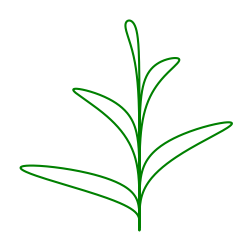

In [209]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [210]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')

Chapter 5 run in 526 seconds
